## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#!pip install tensorflow-gpu

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
print("Number of samples in training set: ",x_train.shape[0])
print("Number of samples in training set: ",x_test.shape[0])

Number of samples in training set:  60000
Number of samples in training set:  10000


In [5]:
""

''

### Find dimensions of an image in the dataset

In [6]:
print("Image dimension: ",x_train[0].shape)

Image dimension:  (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [7]:
n_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes=n_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
n_classes_test = len(np.unique(y_test))
y_test = keras.utils.to_categorical(y_test, num_classes=n_classes_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#x_train = x_train.reshape(x_train.shape[0], 28,28,1)
#x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [10]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# Reshape done in above step before normalization

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Activation,Dropout

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
keras.backend.clear_session()

In [0]:
model = Sequential()

In [0]:
#Conv layer
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))

#Flatten layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
#Compile model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(x_train, y_train, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.3760 - accuracy: 0.8647 - val_loss: 0.3144 - val_accuracy: 0.8821
Epoch 2/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2303 - accuracy: 0.9163 - val_loss: 0.2694 - val_accuracy: 0.9019
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1654 - accuracy: 0.9384 - val_loss: 0.2416 - val_accuracy: 0.9156
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1122 - accuracy: 0.9586 - val_loss: 0.2828 - val_accuracy: 0.9127
Epoch 5/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0747 - accuracy: 0.9727 - val_loss: 0.3177 - val_accuracy: 0.9146
Epoch 6/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0486 - accuracy: 0.9824 - val_loss: 0.3690 - val_accuracy: 0.9141
Epoch 7/10
60000/60000 [=========================

In [18]:
print("Model Accuracy:")
model.evaluate(x_test, y_test)

Model Accuracy:
10000/10000 [==============================] - 1s 90us/sample - loss: 0.4648 - accuracy: 0.9142


[0.4647977864222601, 0.9142]

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
from tensorflow.keras.layers import MaxPool2D, Dropout

In [0]:
keras.backend.clear_session()
model1 = Sequential()

model1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))

#Add 2x2 maxpool layer 
model1.add(MaxPool2D(pool_size=(2,2)))
# Add dropout
model1.add(Dropout(rate=0.25))

#Flatten
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Output Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [23]:
#Compile model
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(x_train, y_train, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3854 - accuracy: 0.8616 - val_loss: 0.2868 - val_accuracy: 0.8957
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2509 - accuracy: 0.9064 - val_loss: 0.2544 - val_accuracy: 0.9052
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2065 - accuracy: 0.9235 - val_loss: 0.2313 - val_accuracy: 0.9141
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1718 - accuracy: 0.9352 - val_loss: 0.2245 - val_accuracy: 0.9174
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1440 - accuracy: 0.9463 - val_loss: 0.2220 - val_accuracy: 0.9240
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1240 - accuracy: 0.9530 - val_loss: 0.2335 - val_accuracy: 0.9221
Epoch 7/10
60000/60000 [==========================

In [25]:
print("Model accuracy after adding maxpool and dropout:")
model1.evaluate(x_test, y_test)

Model accuracy after adding maxpool and dropout:
10000/10000 [==============================] - 1s 84us/sample - loss: 0.2754 - accuracy: 0.9221


[0.27538911352753637, 0.9221]

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=50,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,  
    vertical_flip=False)

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

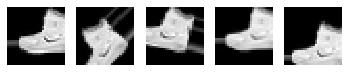

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [29]:
x_train.shape

(60000, 28, 28, 1)

### Run the above model using fit_generator()

In [30]:
keras.backend.clear_session()
model2 = Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))
model2.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),activation="relu"))

#Add 2x2 maxpool layer 
model2.add(MaxPool2D(pool_size=(2,2)))
# Add dropout
model2.add(Dropout(rate=0.25))

#Flatten
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Output Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

#Compile model
model2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit_generator(datagen.flow(x_train, y_train), epochs=10, validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.9486 - accuracy: 0.6514 - val_loss: 0.6671 - val_accuracy: 0.7405
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7085 - accuracy: 0.7351 - val_loss: 0.6946 - val_accuracy: 0.7382
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6437 - accuracy: 0.7595 - val_loss: 0.5617 - val_accuracy: 0.7927
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6006 - accuracy: 0.7743 - val_loss: 0.5398 - val_accuracy: 0.7994
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5648 - accuracy: 0.7882 - val_loss: 0.4950 - val_accuracy: 0.8211
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5465 - accuracy: 0.7961 - val_loss: 0.487

###  Report the final train and validation accuracy

In [31]:
print("Taining accuracy after adding Data Augmentation:")
model2.evaluate(x_train, y_train)

Taining accuracy after adding Data Augmentation:
60000/60000 [==============================] - 5s 75us/sample - loss: 0.4452 - accuracy: 0.8357


[0.4452060534596443, 0.83568335]

In [32]:
print("Test accuracy after adding Data Augmentation:")
model2.evaluate(x_test, y_test)

Test accuracy after adding Data Augmentation:
10000/10000 [==============================] - 1s 84us/sample - loss: 0.4697 - accuracy: 0.8276


[0.46967405133247375, 0.8276]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [34]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [35]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32,32,3)
X_test = X_test.reshape(X_test.shape[0], 32,32,3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(  
    rotation_range=50,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,  
    vertical_flip=True)

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

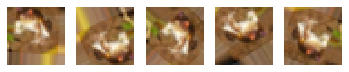

In [40]:
from matplotlib import pyplot as plt
gen = data_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='plasma')
    plt.plot()
plt.show()